# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# print(mouse_metadata)
# print(study_results)

merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.sort_values(["Mouse ID", "Timepoint"], ascending=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23


In [76]:
# Checking the number of mice.
num_of_mice = mouse_metadata["Mouse ID"].count()

print(f"There are {num_of_mice} mice")

There are 249 mice


In [113]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_data = merged_data.loc[merged_data['Mouse ID'] != 'g989', :]
clean_data = merged_data.loc[~merged_data['Mouse ID'].isin(duplicate_mouse_ids), :]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [149]:
# Checking the number of mice in the clean DataFrame.
updated_num_of_mice = len(clean_data['Mouse ID'].unique())
updated_num_of_mice

248

## Summary Statistics

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_regimen = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_by_regimen = grouped_by_regimen.mean()
median_by_regimen = grouped_by_regimen.median()
variance_by_regimen = grouped_by_regimen.var() #
std_dev_by_regimen = grouped_by_regimen.std()
sem_by_regimen = grouped_by_regimen.sem() # Standard Error of Mean

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
data_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_by_regimen,
    "Median Tumor Volume": median_by_regimen,
    "Tumore Volume Variance": variance_by_regimen,
    "Tumor Volume Std. Dev.": std_dev_by_regimen,
    "Tumor Volum Std. Err.": sem_by_regimen
})

data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumore Volume Variance,Tumor Volume Std. Dev.,Tumor Volum Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [165]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_data_summary = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
advanced_data_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

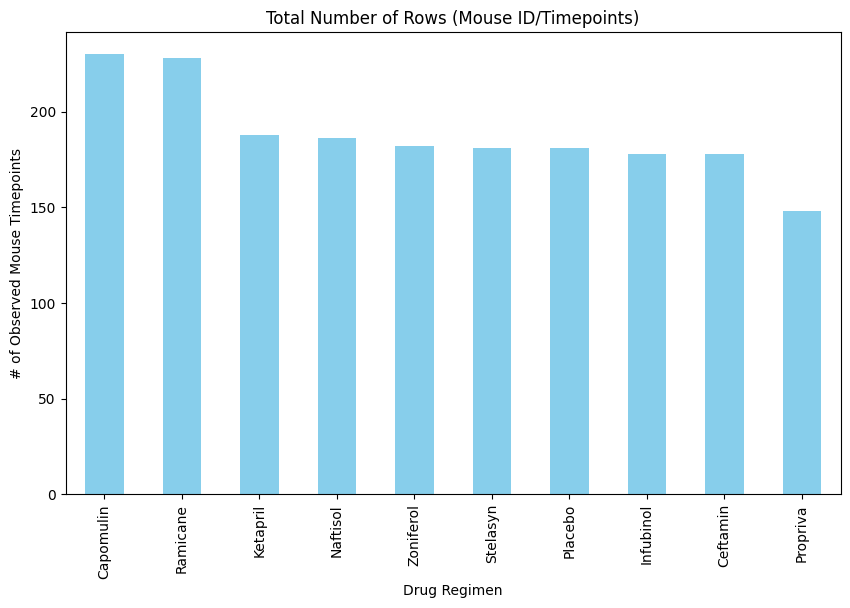

In [168]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", figsize=(10, 6), color="skyblue")

plt.title("Total Number of Rows (Mouse ID/Timepoints)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


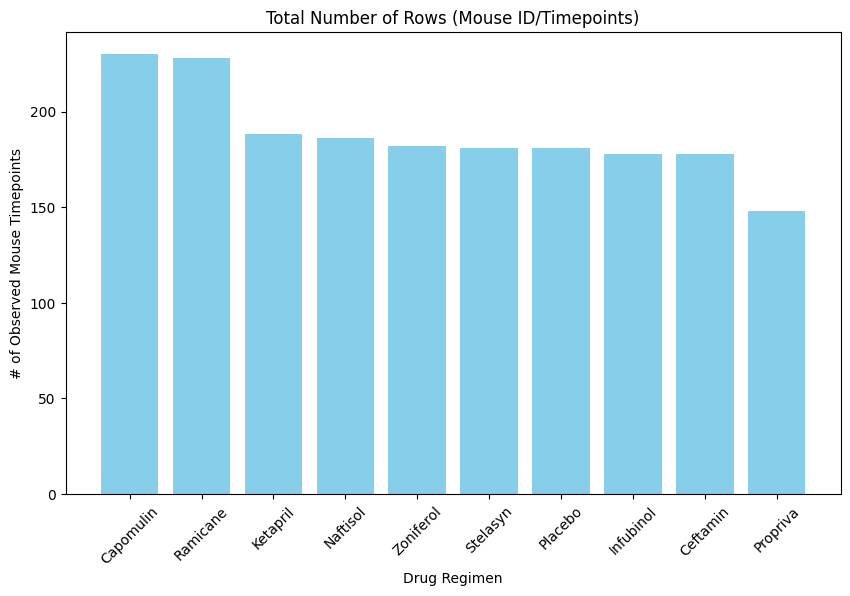

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color="skyblue")

plt.title("Total Number of Rows (Mouse ID/Timepoints)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=45)

plt.show()


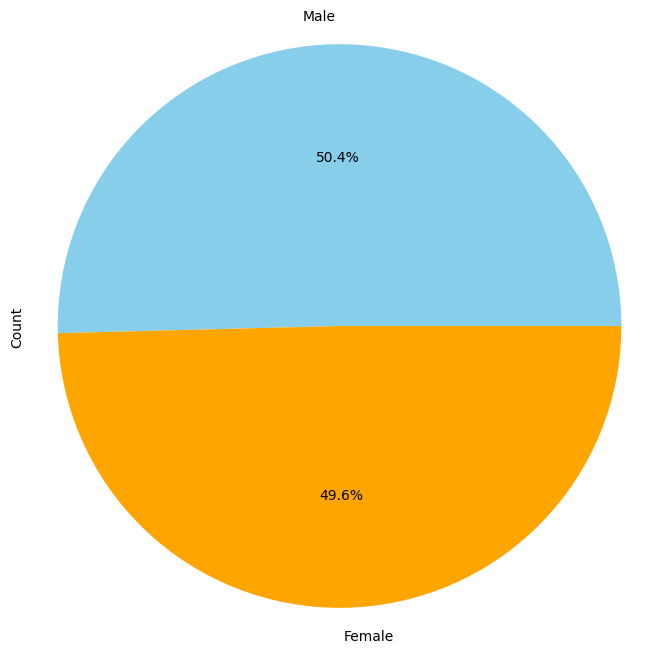

In [188]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# gender_counts = mouse_metadata
gender_counts = mouse_metadata[~mouse_metadata["Mouse ID"].isin(duplicate_mouse_ids)]
gender_counts = gender_counts['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct='%1.1f%%', startangle=0, figsize=(8, 8), colors=['skyblue', 'orange'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.ylabel("Count")

# Show the plot
plt.show()


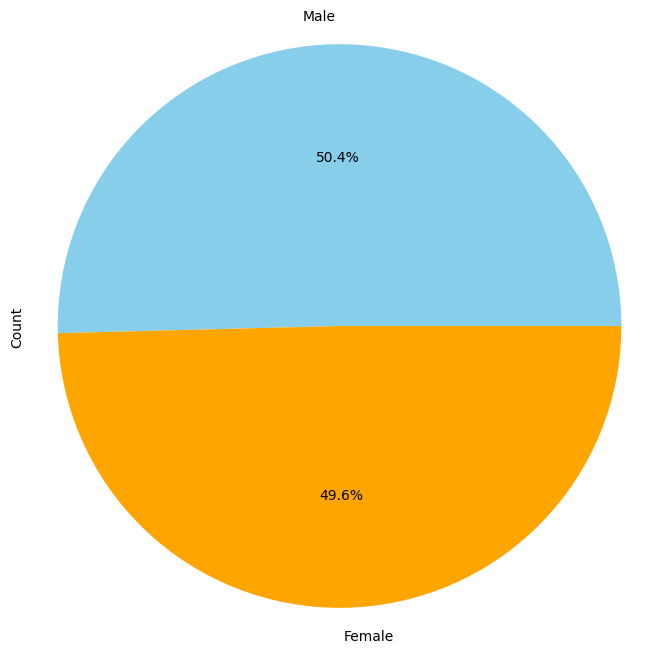

In [187]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Generate the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['skyblue', 'orange'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.ylabel("Count")
# Show the plot
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume for each mouse across the four treatment regimens
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
final_tumor_volume


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [217]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# Filter the data for the four treatment regimens
filtered_data = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# filtered_data


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # print(regimen_data)
    

    # add subset
    tumor_vol.append(regimen_data)

    # Calculate the IQR
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print the results
    # print(f"{treatment} regimen:")
    # print(f"Lower quartile: {lowerq}")
    # print(f"Upper quartile: {upperq}")
    # print(f"IQR: {iqr}")
    # print(f"Lower bound: {lower_bound}")
    # print(f"Upper bound: {upper_bound}")
    
    # Identify potential outliers
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [89]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
